Vamos utilizar os mesmos dados empregados no modelo de regressão linear para uma outra tarefa. Classificar o indivíduo nos sexos masculino e feminino dado o seu peso e altura. 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [6]:
pesos = pd.read_csv('weights.csv', sep=';')

In [7]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


Como já fizemos uma análise exploratória de dados no exercício de regressão linear, vamos pular essa parte e seguirmos direto para a remoção dos outliers.

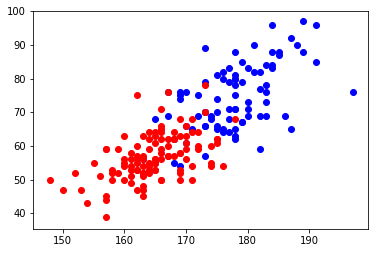

In [8]:
pesos = pesos[pesos.weight <= 100].reset_index(drop=True)
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Observe que, apesar de uma leve sobreposição, conseguimos separar os indivídos do sexo masculino com uma reta. O que vamos encontrar com nossa Regressão Logística é a reta que melhor separa esses dados

In [9]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [10]:
X = pesos[['weight', 'height']]
y = pesos.M

In [12]:
reg_log = LogisticRegression()
reg_log.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

Assim como na regressão linear, podemos observar os coeficientes

In [16]:
reg_log.coef_

array([[ 0.21993397, -0.07531506]])

In [17]:
reg_log.intercept_

array([-1.55761751])

Isso quer dizer que a equação da nossa função logística é: <br>
    $prob(homem) = \frac{1}{1 + e^{-(peso\times 0.2199 - altura\times 0.0753 - 1.5576)}}$ 

Com esses coeficientes identificamos que a reta que separa indivíduos masculinos de femininos é: <br>
$peso\times 0.2199 - altura\times 0.0753 - 1.5576 = 0$

Podemos visualizar essa reta, para isso devemos escrevê-la em função de $peso$ ou $altura$, já que meu $y$ é fixo em $0$. <br>
Com algumas manipulações algébricas temos a reta em função da $altura$ dada por: <br><br>
    $peso = \frac{-altura\times 0.0753 + 1.5576}{0.2199}$

In [18]:
heights = np.linspace(140, 210, 70)
coef_weight = float(reg_log.coef_[0][0])
coef_height = float(reg_log.coef_[0][1])
intercept = float(reg_log.intercept_)

reta_decisao = (-heights*coef_height - intercept) / coef_weight

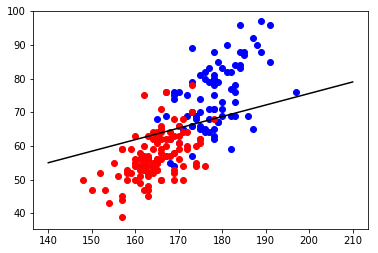

In [38]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Vamos visualizar os dados classificados conferirmos se foram classificados de acordo com nossa superfície de decisão. Para isso classificamos esses mesmos dados, assim obtemos os rótulos dados durante o treinamento.

In [34]:
teste = [[75,173]]
classified = reg_log.predict(teste)
classified

array([1], dtype=uint8)

In [35]:
classified = reg_log.predict(X)
classified

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1], dtype=uint8)

Concatenamos esses dados (na forma de um dataframe), aos dados originais para conseguirmos plotá-los.

In [22]:
pesos_classified = pd.concat([pesos, pd.DataFrame(
    classified, columns=['classificado'])], axis=1)
pesos_classified.head()

,sex,weight,height,M,classificado
0,M,77,182,1,1
1,F,58,161,0,0
2,F,53,161,0,0
3,M,68,177,1,1
4,F,59,157,0,0


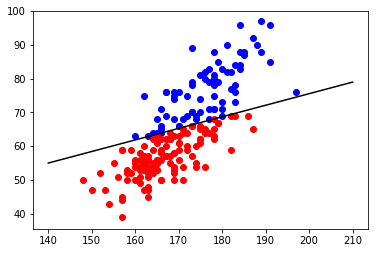

In [23]:
plt.scatter(x=pesos_classified.loc
            [pesos_classified.classificado==1.0, 'height'], 
            y=pesos_classified.loc[pesos_classified.classificado==1.0, 
                                   'weight'], c='blue')
plt.scatter(x=pesos_classified.loc
            [pesos_classified.classificado==0.0, 'height'], 
            y=pesos_classified.loc[pesos_classified.classificado==0.0, 
                                   'weight'], c='red')
plt.plot(heights, reta_decisao, '-', c='black')
plt.show()

Como esperado, os indivíduos "acima" da reta tem valor positivo em relação a ela, logo assumem a classe 1 (masculino). Já os "abaixo", possuem valor negativo e assumem a classe 0

Como o modelo de Regressão Logística é probabilístico, muitas vezes é interessante obtermos a probabilidade de um elemnto pertencer à classe determinada. Neste caso usamos o método predict_proba()

In [24]:
novo_exemplo = [[75.00, 173]]

In [25]:
reg_log.predict_proba(novo_exemplo)

array([[ 0.12921413,  0.87078587]])

Portanto, para nosso modelo, uma pessoa de 1,73m e 75Kg, a probabilidade de ser do sexo masculino é 87% e do feminino 13%